## Data Characters

In [2]:
import pandas as pd
df_test = pd.read_csv("test_table.csv")
df_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [4]:
df_test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [6]:
df_user=pd.read_csv("user_table.csv")
df_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [7]:
df_user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [10]:
#check uniqeness before join 2 tables
print("df_test.user_id\t", len(df_test['user_id']),len(df_test['user_id'].unique()))

df_test.user_id	 453321 453321


In [11]:
print("df_user.user_id\t", len(df_user['user_id']),len(df_user['user_id'].unique()))

df_user.user_id	 452867 452867


In [15]:
df = pd.merge(left=df_test,right=df_user,how="left", on="user_id")
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [21]:
df.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


## Data Analysis

In [18]:
df[['test','conversion']].groupby('test').mean()

,conversion
test,
0,0.055179
1,0.043425


## 1. conversion rate by country

C:\python-work\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


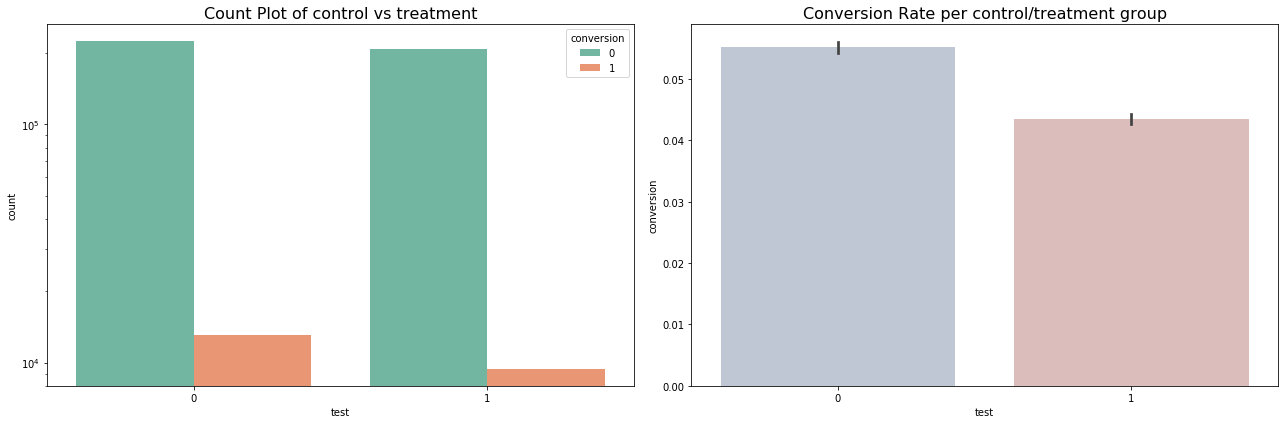

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='test', hue='conversion', data=df, ax=ax[0], palette="Set2")
ax[0].set_title('Count Plot of control vs treatment', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='test', y='conversion', data=df, ax=ax[1],palette="vlag");
ax[1].set_title('Conversion Rate per control/treatment group', fontsize=16)
plt.tight_layout()
plt.show()


### Treatment and control groups are not sampled equally in three coutries: Spain, Argentina, Uruguay. Spain has extremely high conversion rate while was not presented in treatment group.Argentina, Uruguay have low conversion rate, while over  presented in treatment group. As the result, the coversion rate in treatment group is low.

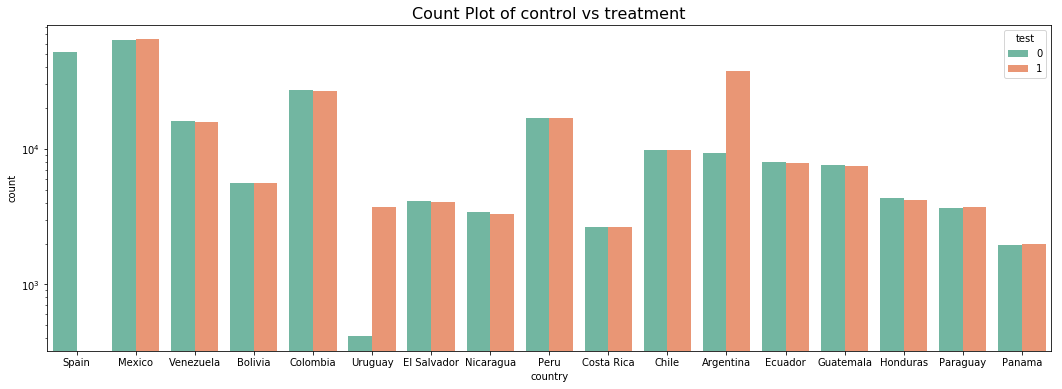

In [46]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x='country', hue='test', data=df, ax=ax, palette="Set2")
ax.set_title('Count Plot of control vs treatment', fontsize=16)
ax.set_yscale('log')
plt.show()

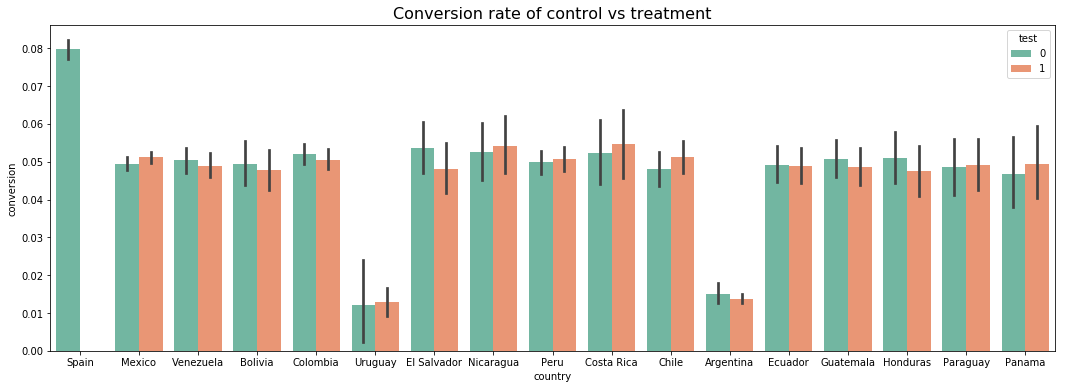

In [47]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y ='conversion',hue='test',data =df,ax=ax, palette="Set2")
ax.set_title('Conversion rate of control vs treatment', fontsize=16)
plt.show()

### If filter Spain, Argentina, Uruguay, the conversion rates of control group and treatment group are close

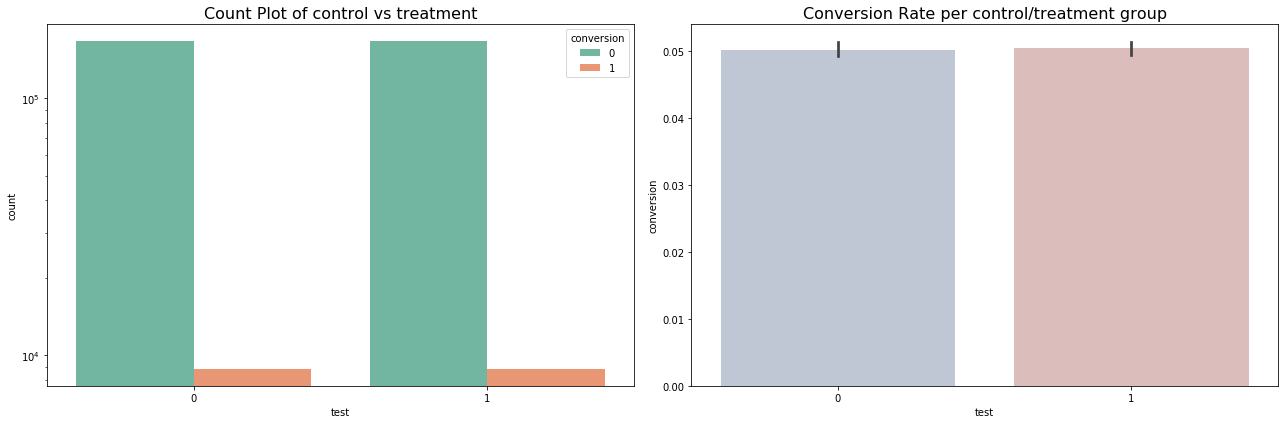

In [29]:
df_filter = df[(df['country']!='Spain')&(df['country']!='Argentina')&(df['country']!='Uruguay')]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='test', hue='conversion', data=df_filter, ax=ax[0], palette="Set2")
ax[0].set_title('Count Plot of control vs treatment', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='test', y='conversion', data=df_filter, ax=ax[1],palette="vlag");
ax[1].set_title('Conversion Rate per control/treatment group', fontsize=16)
plt.tight_layout()
plt.show()

## 2. Conversion Rate By Source

In [54]:
group1 = df[['source','test', 'conversion']].groupby(['source','test'])
group1['conversion'].value_counts()

source  test  conversion
Ads     0     0             90058
              1              5290
        1     0             82761
              1              3768
Direct  0     0             45056
              1              2684
        1     0             41263
              1              1831
SEO     0     0             89128
              1              5122
        1     0             82580
              1              3780
Name: conversion, dtype: int64

In [55]:
conversion_rate = df[['source', 'test','conversion']].groupby(['source','test']).mean().reset_index()
conversion_rate

,source,test,conversion
0,Ads,0,0.055481
1,Ads,1,0.043546
2,Direct,0,0.056221
3,Direct,1,0.042489
4,SEO,0,0.054345
5,SEO,1,0.043770


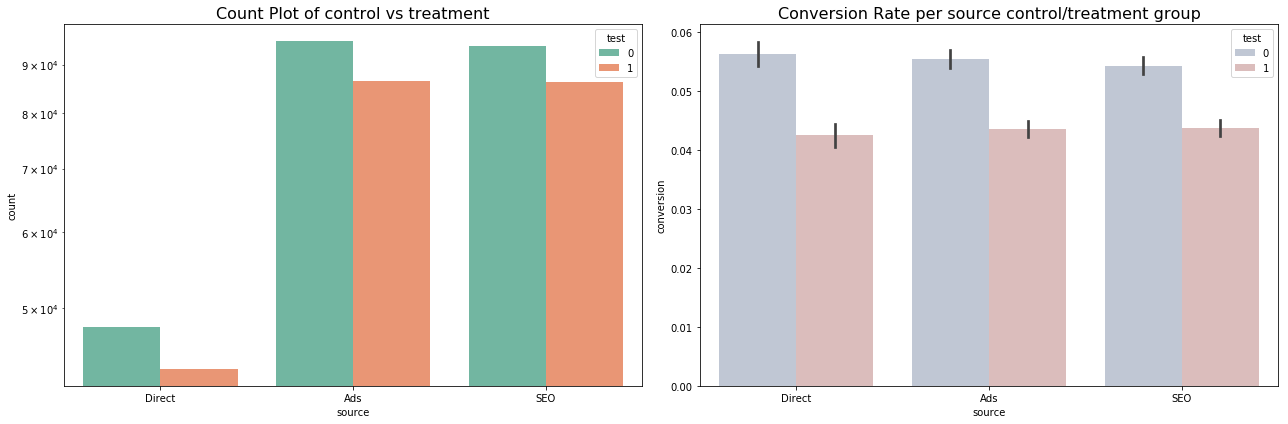

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='test', data=df, ax=ax[0], palette="Set2")
ax[0].set_title('Count Plot of control vs treatment', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='conversion', hue = 'test', data=df, ax=ax[1],palette="vlag");
ax[1].set_title('Conversion Rate per source control/treatment group', fontsize=16)
plt.tight_layout()
plt.show()

3. Conversion Rate By Language

In [64]:
group2 = df[['browser_language','test', 'conversion']].groupby(['browser_language','test'])
group2['conversion'].value_counts()

browser_language  test  conversion
EN                0     0              31233
                        1               1770
                  1     0              28850
                        1               1284
ES                0     0             186806
                        1              10967
                  1     0             171948
                        1               7826
Other             0     0               6203
                        1                359
                  1     0               5806
                        1                269
Name: conversion, dtype: int64

In [65]:
conversion_rate = df[['browser_language', 'test','conversion']].groupby(['browser_language','test']).mean().reset_index()
conversion_rate

,browser_language,test,conversion
0,EN,0,0.053631
1,EN,1,0.042610
2,ES,0,0.055452
3,ES,1,0.043532
4,Other,0,0.054709
5,Other,1,0.044280


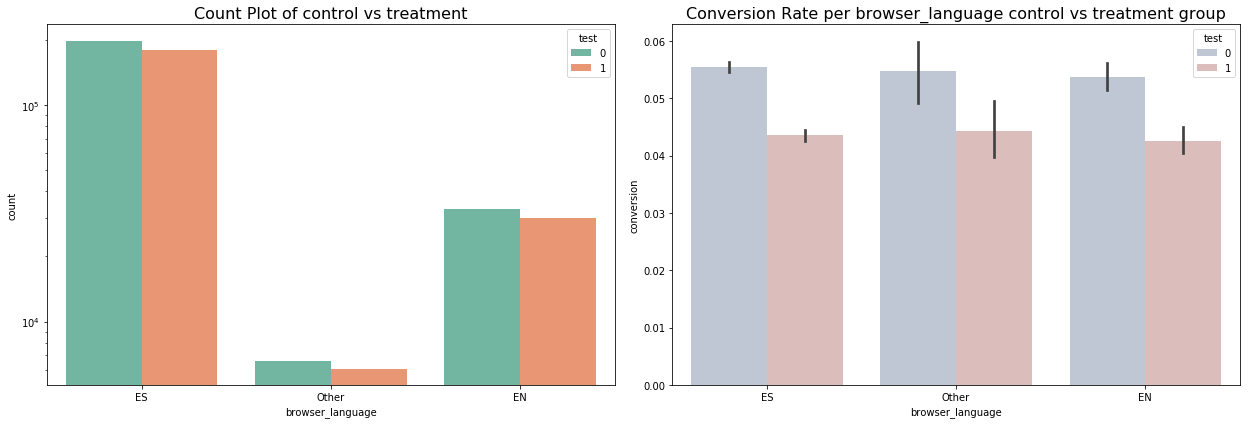

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser_language', hue='test', data=df, ax=ax[0], palette="Set2")
ax[0].set_title('Count Plot of control vs treatment', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='browser_language', y='conversion', hue = 'test', data=df, ax=ax[1],palette="vlag");
ax[1].set_title('Conversion Rate per browser_language control vs treatment group', fontsize=16)
plt.tight_layout()
plt.show()

Did other analysis by category, like ads_channel, sex, age_group, the converstion rate is consistently low in treatment group. So the finding at 1. conversion rate by country is the only root cause of low conversion rate at test group.